# NLP Challenge: IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

Do a thorough Exploratory Data Analysis of the dataset and report the final performance metrics for your approach. Suggest ways in which you can improve the model. Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## Data pre-processing

Pre-process the data via removing redundant words and stopwords and converting all words to lower-case.

In [1]:
import csv
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [93]:
# Load stop words
nltk.download('stopwords')
nltk.download('punkt') #  a pre-trained model that provides support for tokenization
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Remove <br />
    text = re.sub(r'<br />', '', text, flags=re.MULTILINE)
    
    # Convert to lower case
    text = text.lower()
    
    # Remove stop words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [token for token in text_tokens if not token in stop_words]
    filtered_text = ' '.join(tokens_without_sw)
    
    return filtered_text

[nltk_data] Downloading package stopwords to C:\Users\MEI-KUEI
[nltk_data]     LU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MEI-KUEI
[nltk_data]     LU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [94]:
# read csv file 
data = []
data_path = 'IMDB_Dataset.csv'

with open(data_path, 'r', encoding='utf-8-sig') as f:
    csv_file = csv.reader(f)
    data = [row for row in csv_file]

In [95]:
df = pd.DataFrame(data)
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header
df.head()

,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [96]:
process_text = []

for i in range(50000):
    process_text.append(preprocess(df['review'].iloc[i]))

In [97]:
# Add the new list as a new column to the DataFrame
df['Processed_review'] = process_text
df

,review,sentiment,Processed_review
1,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
2,A wonderful little production. <br /><br />The...,positive,wonderful little production . filming techniqu...
3,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
4,Basically there's a family where a little boy ...,negative,basically 's family little boy ( jake ) thinks...
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visuall...
...,...,...,...
49996,I thought this movie did a down right good job...,positive,thought movie right good job . n't creative or...
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogue , bad acting , idiotic..."
49998,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49999,I'm going to have to disagree with the previou...,negative,'m going disagree previous comment side maltin...


## Exploratory Data Analysis

In [ ]:
positive = df[df['sentiment'] == 'positive']
negative = df[df['sentiment'] == 'negative']

positive    25000
negative    25000
Name: sentiment, dtype: int64


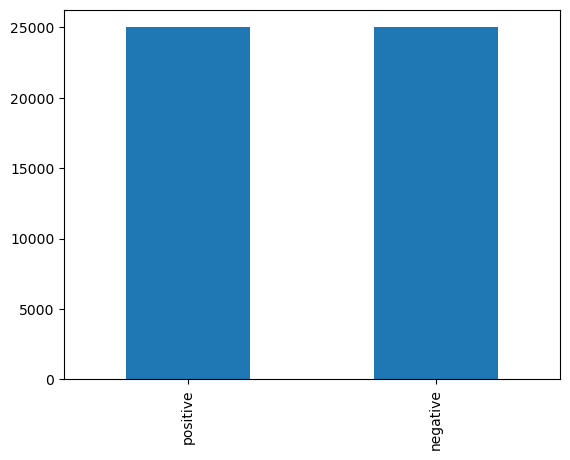

In [121]:
# Visualising the distribution of the target variable.
print(df.sentiment.value_counts())
df.sentiment.value_counts().plot(kind = 'bar')
plt.show()

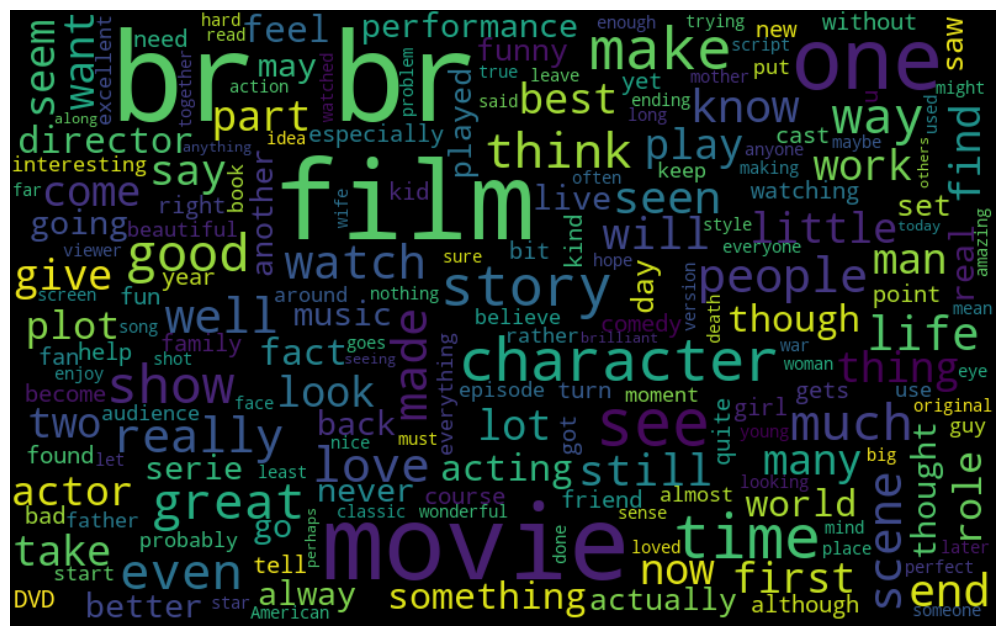

In [124]:
# frequent words visualization for positve reviews 

all_words = " ".join([sentence for sentence in df['review'][df['sentiment']=='positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

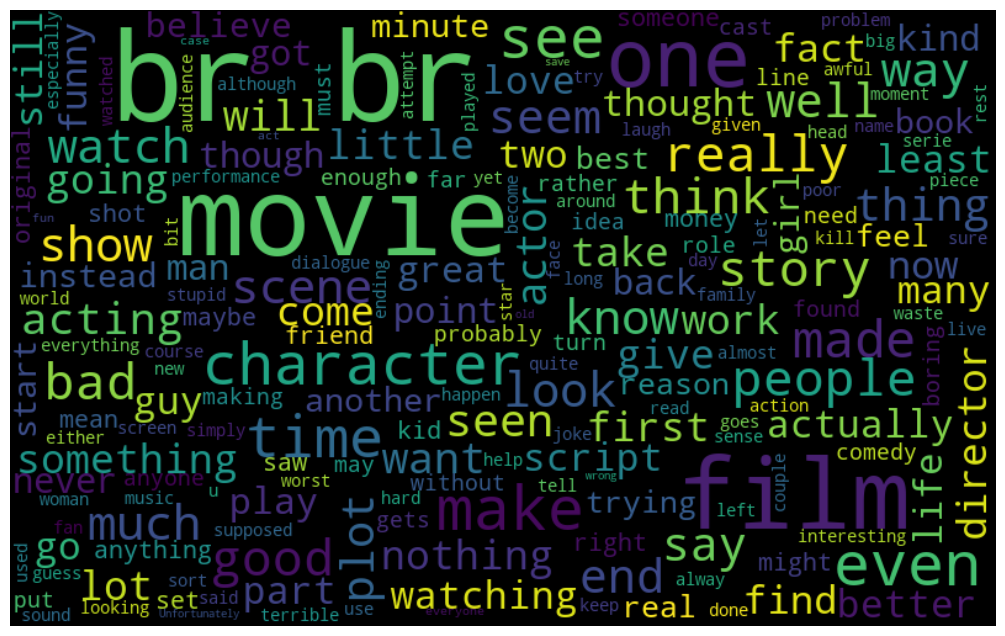

In [125]:
# frequent words visualization for negative reviews 

all_words = " ".join([sentence for sentence in df['review'][df['sentiment']=='negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature extraction via bag-of-words representation

Extract the term frequency-inverse document frequency (TF-IDF) for every document. TF-IDF evaluates the relevance of a word is to a given document in a collection of documents. It is computed via multiplying the number of occurrences of a word in a document and the inverse document frequency of the word across a set of documents.

Top 25 words in the positive review 

In [84]:
tfIdfVectorizer = TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(positive['Processed_review'])
tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
tfidf = tfidf.sort_values('TF-IDF', ascending=False)
print (tfidf.head(25))

               TF-IDF
oz           0.442141
violence     0.200113
prison       0.182113
inmates      0.171881
forget       0.157192
struck       0.138662
scuffles     0.120146
inwards      0.120146
ll           0.117748
gangstas     0.115477
penitentary  0.115477
agreements   0.107495
bitches      0.104182
word         0.103975
aryans       0.102826
show         0.102627
latinos      0.101613
nickel       0.101613
emerald      0.100515
due          0.100346
privacy      0.096944
episode      0.095888
city         0.095033
fronts       0.093631
oswald       0.092021


Top 25 words in the negative review

In [85]:
tfIdfVectorizer = TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(negative['Processed_review'])
tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
tfidf = tfidf.sort_values('TF-IDF', ascending=False)
print (tfidf.head(25))

               TF-IDF
jake         0.551088
parents      0.282771
closet       0.256922
drama        0.251797
zombie       0.198509
divorcing    0.185104
thriller     0.179980
boogeyman    0.156288
slower       0.146177
arguing      0.139187
rambo        0.138467
descent      0.130230
spots        0.124985
ruins        0.121736
ignore       0.118066
dialogs      0.117943
meaningless  0.116519
opera        0.106883
soap         0.105931
watchable    0.099302
decides      0.097116
thinks       0.096781
fighting     0.095771
decide       0.094551
suddenly     0.093718


## Feature extraction via word2vec representation

Extract the word2vec representation for each document. Word2vec leverages a neural network and a large language corpus to output a vector representation of a document via learning word similarities and capturing the contextual meaning of the words. 

In [86]:
# Train a Word2Vec model on your corpus of documents
model = Word2Vec(process_text, vector_size=300, window=5, min_count=5, workers=4)

# Obtain the Word2Vec representation for each document in your corpus
doc_vectors = []
for doc in process_text:
    words = doc.split()
    vectors = [model.wv.get_vector(word) for word in words if word in model.wv.key_to_index]
    if vectors:
        doc_vector = sum(vectors) / len(vectors)
    else:
        doc_vector = [0] * 300  # if no words in vocab, use zero vector
    doc_vectors.append(doc_vector)

## Review classification with Random Forest

In [90]:
tfidf = tfIdfVectorizer.fit_transform(df['Processed_review'])

In [99]:
# Add the new list as a new column to the DataFrame
df['word2vec'] = doc_vectors
df['TF-IDF'] = list(tfidf)
df

,review,sentiment,Processed_review,word2vec
1,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...,"[0.30815715, 0.19138381, -0.12065128, -0.01825..."
2,A wonderful little production. <br /><br />The...,positive,wonderful little production . filming techniqu...,"[0.2523241, 0.17772922, -0.16176853, 0.1096976..."
3,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,"[0.29740378, 0.12563016, -0.09930591, 0.082781..."
4,Basically there's a family where a little boy ...,negative,basically 's family little boy ( jake ) thinks...,"[0.25177735, 0.31271428, -0.11365864, 0.180653..."
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visuall...,"[0.30615774, 0.22650091, -0.14941713, -0.02184..."
...,...,...,...,...
49996,I thought this movie did a down right good job...,positive,thought movie right good job . n't creative or...,"[0.33465004, 0.1697293, -0.124990575, 0.020238..."
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogue , bad acting , idiotic...","[0.3365669, 0.18850604, -0.1503556, 0.00865876..."
49998,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...,"[0.29525027, 0.23899497, -0.07822679, 0.015214..."
49999,I'm going to have to disagree with the previou...,negative,'m going disagree previous comment side maltin...,"[0.31426436, 0.16596323, -0.0894153, 0.0184372..."


Train with TF-IDF feature

In [106]:
# transform the classes from text to numbers as labels 
# 0: negative, 1: positive
y = df[["sentiment"]] 

sentiment2number_dict = {
    'negative':0,
    'positive':1
}

y = y.replace({"sentiment": sentiment2number_dict})

In [108]:
# split the data into training and testing set using 70%/30% split. 
x_train, x_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.33, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33500, 104072)
(16500, 104072)
(33500, 1)
(16500, 1)


In [111]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
ypred = model.predict(x_test)

C:\Users\MEI-KUEI LU\AppData\Local\Temp\ipykernel_10176\2448598726.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [114]:
# Classification Report 
print(metrics.classification_report(y_test, ypred))

# Confusion matrix of RFC
confused = confusion_matrix(y_test,ypred)
print(confused)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      8208
           1       0.87      0.88      0.87      8292

    accuracy                           0.87     16500
   macro avg       0.87      0.87      0.87     16500
weighted avg       0.87      0.87      0.87     16500

[[7083 1125]
 [1033 7259]]


Train with word2vec feature

In [116]:
# split the data into training and testing set using 70%/30% split. 

x_train, x_test, y_train, y_test = train_test_split(doc_vectors, y, test_size=0.33, random_state=42)

print(np.array(x_train).shape)
print(np.array(x_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(33500, 300)
(16500, 300)
(33500, 1)
(16500, 1)


In [117]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
ypred = model.predict(x_test) 

C:\Users\MEI-KUEI LU\AppData\Local\Temp\ipykernel_10176\2448598726.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [118]:
# Classification Report 
print(metrics.classification_report(y_test, ypred))

# Confusion matrix of RFC
confused = confusion_matrix(y_test,ypred)
print(confused) 

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      8208
           1       0.58      0.63      0.60      8292

    accuracy                           0.59     16500
   macro avg       0.59      0.59      0.59     16500
weighted avg       0.59      0.59      0.59     16500

[[4510 3698]
 [3107 5185]]


<h3> Conclusions </h3> 

The accuracy of the TF-IDF feature and word2vec feature for random forest model are 0.87 and 0.59 respectively. TF-IDF feature performs much better than word2vec feature. Hyperparameter tuning, feature selection, cross-validation and regularization can be implemented to prevent overfitting and improve the generalization performance of the model. Other supervised machine learning models such as SVM or Logisitic Regression might also be tested to investigate the performances of these models, which might improve the model performance.